# KNN Assignment_투빅스 14기 이혜린

## 1. Preprocessing & EDA

In [13]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings

%matplotlib inline
plt.style.use('seaborn')
warnings.filterwarnings(action='ignore')

### 데이터 로드

In [14]:
df = pd.read_csv('iris.csv')
df = df.drop(['Id'], axis=1)
df = pd.DataFrame(df)

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 결측치 확인

In [15]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### 분포 확인

In [16]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Pairplot

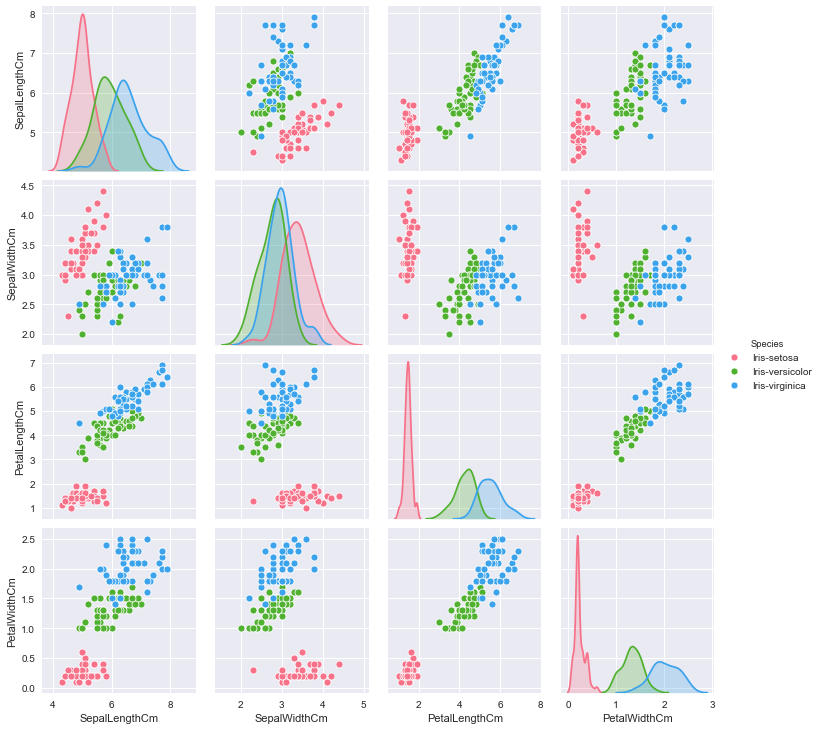

In [17]:
sns.pairplot(df, hue='Species', palette='husl')

setosa 그룹과 나머지 그룹은 뚜렷하게 구분되는 편이다.

### Scatter Plot

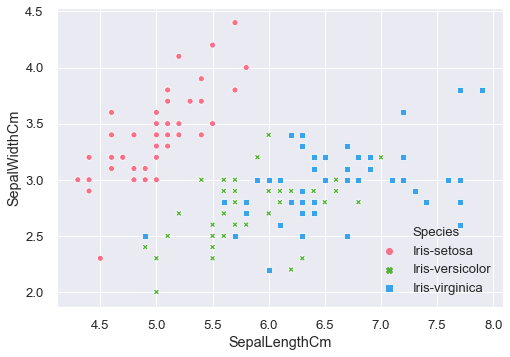

In [18]:
sns.set(font_scale=1.2)
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data=df, hue='Species', style='Species', palette='husl')

x = `SepalLength`, y = `SepalWidth`인 scatter plot을 그린 결과 setosa group은 거의 분류가능한 반면,   
versicolor와 virginica 그룹은 섞여 있어 분류가 힘든 것을 볼 수 있다.

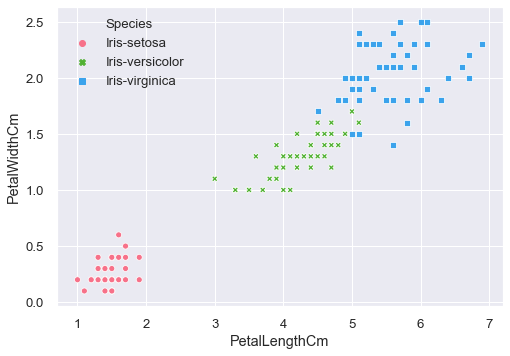

In [19]:
sns.set(font_scale=1.2)
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data=df, hue='Species', style='Species', palette='husl')

x = `PetalLength`, y = `PetalWidth`인 scatter plot을 그린 결과, 그룹별로 뚜렷하게 분류가능함을 알 수 있다.

또한 pairplot과 describe 등을 살펴본 결과 각 변수는 모두 결측치가 없고,  
평균 및 분산을 비롯한 대체적인 분포에 큰 차이가 없는 것으로 보이므로 연속형 변수에 대한 scaling은 따로 하지 않는다.

In [20]:
X = df.drop('Species', axis=1)
raw_y = df['Species']

In [21]:
print('X:',X.shape, ', y:',raw_y.shape) # obs = 150

X: (150, 4) , y: (150,)


In [22]:
print(raw_y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


### 범주형 변수 OneHotEncoding

In [23]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
raw_y = np.array(raw_y)
encoder.fit(raw_y.reshape(-1,1))
y = encoder.transform(raw_y.reshape(-1,1)).toarray() # toarray()를 사용해야 정상적으로 one-hot-encoding 가능

### Train, Test 분리

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

데이터의 개수가 많지 않으므로(obs = 150) test_size를 0.2로 설정하였다.

## 2. GridSearch

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = {
    'n_neighbors' : [1, 3, 5, 7, 9], 'weights' : ['uniform', 'distance'], 'metric' : ['euclidean', 'manhattan', 'mahalanobis']
}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=3, n_jobs=-1) # 3-fold CV
gs_result = gs.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    7.5s finished


In [26]:
gs_result.cv_results_

{'mean_fit_time': array([0.00398914, 0.00332395, 0.00299319, 0.00299287, 0.00332435,
        0.00299279, 0.00299168, 0.00299215, 0.00332506, 0.00498748,
        0.00299033, 0.00365035, 0.00765252, 0.00798074, 0.00431784,
        0.00597858, 0.00498478, 0.00499058, 0.00498692, 0.00465854,
        0.01661555, 0.00432618, 0.00531546, 0.00731413, 0.00465568,
        0.00598502, 0.00498207, 0.00598749, 0.00398914, 0.00465655]),
 'std_fit_time': array([5.61957980e-07, 4.69909424e-04, 8.77806426e-07, 8.48537942e-07,
        4.69966275e-04, 8.77806426e-07, 1.03008599e-06, 1.94667955e-07,
        4.70471865e-04, 2.82029853e-03, 3.16497608e-06, 4.65840632e-04,
        5.16704136e-03, 2.44395895e-03, 1.88391422e-03, 2.14806966e-03,
        1.63209638e-03, 1.63112283e-03, 2.15508710e-03, 1.69180783e-03,
        1.71700943e-02, 4.75023170e-04, 2.05084253e-03, 5.42219635e-03,
        1.69674180e-03, 2.15431456e-03, 2.82344919e-03, 2.44337995e-03,
        8.14588291e-04, 9.39031805e-04]),
 'mean_scor

In [27]:
print(gs_result.best_score_)
print(gs_result.best_params_)

0.9583333333333334
{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


위 결과를 토대로 최종 모델을 만든다.

In [28]:
knn_cl = KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

In [29]:
knn_cl.fit(X_train, y_train) # 모델 훈련

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

## 3. Evaluation

### Accuracy

In [30]:
print('Test data로 구한 accuracy : {}'.format(knn_cl.score(X_test, y_test)))

Test data로 구한 accuracy : 1.0


### Prediction of New Data

In [31]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print(knn_cl.predict(X_new))
print("예측한 타깃의 이름: setosa")

[[1. 0. 0.]]
예측한 타깃의 이름: setosa


## 4. Key Point & Limitation  
  
### Key Point 
1. Uniform KNN 보다는, Weighted KNN이 더 좋은 모델로 선택되었다.  
2. Weight를 부여할 때 사용된 distance는 euclidean, manhattan, mahalanobis이고 이 중 optimal method는 euclidean 이다.  
3. K의 개수는 일반적으로 홀수를 사용함을 잊지말자.  
  
  
### Limitation  
1. KNN의 경우 데이터의 개수가 많을수록 좋은 성능을 보이는데, 위 분석의 경우 데이터의 개수가 충분하지 않았다.